#### torchvision 제공 이미지 전처리 관련 기능
- torchvision.transforms 서브 모듈
    * 이미지 크기 조절
    * 이미지 정규화
    * 이미지 자르기
    * 이미지 회전 등등 다양한 기능 제공
    * 이미지 데이터 타입 ==> Pillow Image

[1] 모듈로딩 및 데이터 설정

In [19]:
import cv2                                   # ==> 이미지 데이터 ndarray
from PIL import Image                        # ==> 이미지 데이터 JpegImage
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms            # pytorch 지원 이미지 변환 관련 모듈
import torch

In [20]:
## 데이터 관련 설정
IMG_PATH='../image/'
IMG_FILE = IMG_PATH+ 'eve.jpg'

In [21]:
cv_img = cv2.imread(IMG_FILE)
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)   # BGR ==> RGB

pil_img = Image.open(IMG_FILE)

In [22]:
print(f'type(cv_img) : {type(cv_img)}')
print(f'type(pil_img) : {type(pil_img)}')

type(cv_img) : <class 'numpy.ndarray'>
type(pil_img) : <class 'PIL.JpegImagePlugin.JpegImageFile'>


* ndarray ===> Tensor

In [23]:
# 일반적인 텐서 생성 [H, W, C]
cvTensor1 = torch.tensor(cv_img)
print(f'cvTensor1 : {cvTensor1.shape}, {cvTensor1.ndim}D')

# 이미지용 텐서 생성 ==> 채널 순서/위치 자동  [C, H, W]
cvTensor2= transforms.ToTensor()(cv_img)
print(f'cvTensor2 : {cvTensor2.shape}, {cvTensor2.ndim}D')

cvTensor1 : torch.Size([678, 1011, 3]), 3D
cvTensor2 : torch.Size([3, 678, 1011]), 3D


In [24]:
# 필로우를 탠서
pilTensor1 = torch.tensor(np.array(pil_img))
print(f'pilTensor1 : {pilTensor1.shape}, {pilTensor1.ndim}D')

# 이미지용 텐서 생성 ==> 채널 순서/위치 자동
pilTensor2 = transforms.ToTensor()(np.array(pil_img))
print(f'pilTensor2 : {pilTensor2.shape}, {pilTensor2.ndim}D')

#어레이 변환 없이 바로
pilTensor3 = transforms.PILToTensor()(pil_img)
print(f'pilTensor3 : {pilTensor3.shape}, {pilTensor3.ndim}D')

pilTensor1 : torch.Size([678, 1011, 3]), 3D
pilTensor2 : torch.Size([3, 678, 1011]), 3D
pilTensor3 : torch.Size([3, 678, 1011]), 3D


cvNP : (678, 1011, 3), 3D


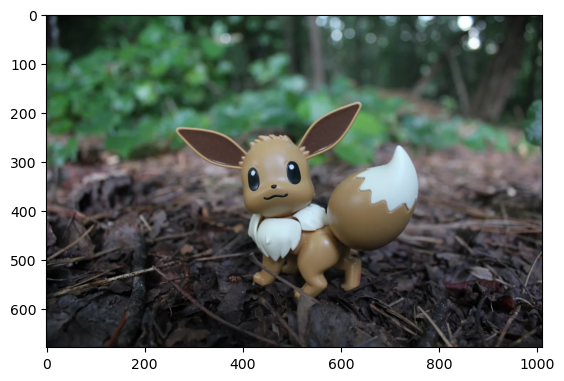

In [25]:
cvNP = cvTensor1.numpy()
print(f'cvNP : {cvNP.shape}, {cvNP.ndim}D')

plt.imshow(cvNP)
plt.show()

cvNP : (678, 1011, 3), 3D


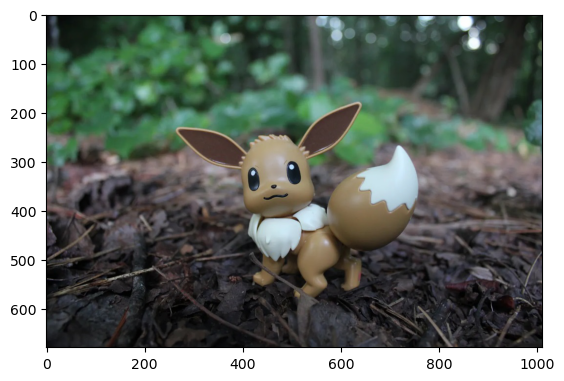

In [26]:
pilNP = pilTensor1.numpy()
print(f'cvNP : {pilNP.shape}, {pilNP.ndim}D')

plt.imshow(pilNP)
plt.show()

In [33]:
from torchvision.transforms import v2

v2.ToImage()(cv_img).shape

torch.Size([3, 678, 1011])

* Tensor ===> PIL Image

In [34]:
pilIMG1 = transforms.ToPILImage()(pilTensor2)
print(f'pilIMG1  : {pilIMG1.width}, {pilIMG1.height}, {pilIMG1.mode}')
pilIMG1.show()

pilIMG1  : 1011, 678, RGB
